In [31]:
import pandas
import matplotlib.pyplot as plt
import numpy
import math
import time
'Importing the data set'
train = pandas.read_csv('train.csv')
test = pandas.read_csv('test.csv')
testcount=pandas.read_csv('hour.csv')
testcount['dteday'] = pandas.to_datetime(testcount['dteday'], errors='coerce')
testcount=testcount[(testcount['dteday'].dt.day >19)]

In [32]:
'For consistency we are adding these columns'
test['casual']=numpy.nan
test['registerd']=numpy.nan
test['count']=numpy.nan
'Converting datetime column to proper format'
train['datetime']=pandas.to_datetime(train['datetime'])
test['datetime']=pandas.to_datetime(test['datetime'])

In [33]:
'Extracting Year,Month,Day,Hour'
train['year']=train['datetime'].dt.year
train['month']=train['datetime'].dt.month
train['hour']=train['datetime'].dt.hour
train['day']=train['datetime'].dt.dayofweek
test['year']=test['datetime'].dt.year
test['month']=test['datetime'].dt.month
test['hour']=test['datetime'].dt.hour
test['day']=test['datetime'].dt.dayofweek
train= train[numpy.abs(train["count"]-train["count"].mean())<=(3*train["count"].std())] 

In [34]:
'Setting up x and y for training and testing'
x=['season','holiday','workingday','weather','temp','humidity','windspeed','year','month','hour','day']
y=['count']
x1=['season','holiday','workingday','weathersit','hum','windspeed','temp','year','month','hour','day']
trainx=train[x]
trainy=train[y]
testx=test[x]
testy=test[y]
testcounty=testcount['cnt']

In [35]:
'Splitting data'
train_size = int(0.8 * len(train))
trainx_set = trainx[:train_size]
trainy_set = trainy[:train_size]
validationx_set = trainx[train_size:]
validationy_set = trainy[train_size:]

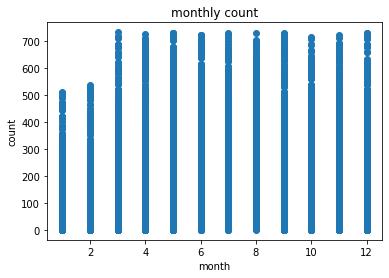

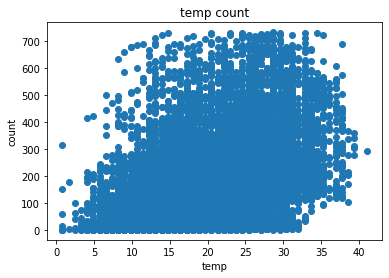

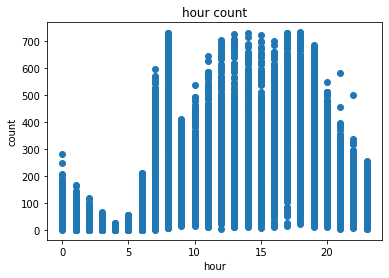

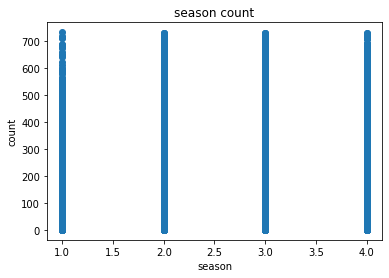

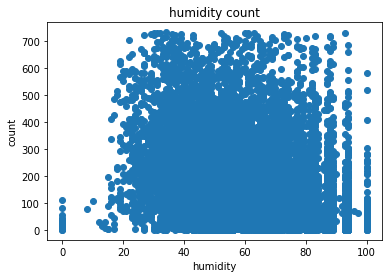

In [36]:
"Plotting 5 Features against count"
"Month vs Count"
plt.scatter(trainx['month'], trainy)
plt.xlabel('month')
plt.ylabel('count')
plt.title('monthly count')
plt.show()
"Temp vs Count"
plt.scatter(trainx['temp'], trainy)
plt.xlabel('temp')
plt.ylabel('count')
plt.title('temp count')
plt.show()
"Hour vs Count"
plt.scatter(trainx['hour'], trainy)
plt.xlabel('hour')
plt.ylabel('count')
plt.title('hour count')
plt.show()
"Season vs Count"
plt.scatter(trainx['season'], trainy)
plt.xlabel('season')
plt.ylabel('count')
plt.title('season count')
plt.show()
"Humidity vs Count"
plt.scatter(trainx['humidity'], trainy)
plt.xlabel('humidity')
plt.ylabel('count')
plt.title('humidity count')
plt.show()

In [37]:
"Statistics of Features"
holiday=train.groupby("holiday")['count'].mean()
print(holiday)
season=train.groupby("season")['count'].mean()
print(season)
year=train.groupby("year")['count'].mean()
print(year)
month=train.groupby("month")['count'].mean()
print(month)
day=train.groupby("day")['count'].mean()
print(day)
hour=train.groupby("hour")['count'].mean()
print(hour)
workingday=train.groupby("workingday")['count'].mean()
print(workingday)
temp=train.groupby("temp")['count'].mean()
print(temp)
humidity=train.groupby("humidity")['count'].mean()
print(humidity)
windspeed=train.groupby("windspeed")['count'].mean()
print(windspeed)
holiday=train.groupby("holiday")['count'].median()
print(holiday)
season=train.groupby("season")['count'].median()
print(season)
year=train.groupby("year")['count'].median()
print(year)
month=train.groupby("month")['count'].median()
print(month)
day=train.groupby("day")['count'].median()
print(day)
hour=train.groupby("hour")['count'].median()
print(hour)
workingday=train.groupby("workingday")['count'].median()
print(workingday)
temp=train.groupby("temp")['count'].median()
print(temp)
humidity=train.groupby("humidity")['count'].median()
print(humidity)
windspeed=train.groupby("windspeed")['count'].median()
print(windspeed)

holiday
0    182.918105
1    185.877814
Name: count, dtype: float64
season
1    115.369128
2    206.779510
3    219.048048
4    190.904039
Name: count, dtype: float64
year
2011    144.223349
2012    222.550122
Name: count, dtype: float64
month
1      90.366516
2     110.003330
3     145.399108
4     177.013363
5     212.294118
6     231.093855
7     225.133929
8     218.130631
9     213.777273
10    205.184510
11    193.677278
12    174.349451
Name: count, dtype: float64
day
0    180.950916
1    177.693377
2    172.579260
3    182.607119
4    190.322517
5    195.949431
6    180.474651
Name: count, dtype: float64
hour
0      55.138462
1      33.859031
2      22.899554
3      11.757506
4       6.407240
5      19.767699
6      76.259341
7     213.116484
8     343.719540
9     221.780220
10    175.092308
11    210.674725
12    254.334802
13    257.787281
14    243.442982
15    254.298246
16    315.347253
17    406.244216
18    376.425000
19    314.338462
20    228.517544
21    173.370614
2

In [38]:
'Calculating Root Mean Sqaure Error'
def RMSE(p,r):
    prediction=p.clip(0)
    error=numpy.sqrt(numpy.mean((numpy.log(prediction+1)-numpy.log(r+1))**2))
    return error

In [39]:
"Parameter estiamtion using Newton Raphson"
"I will be using a scale of pow(10,6) to normalise value throughout the code"
def logloss(Theta):
    sum=0
    for i in range(0,len(X)):
        x=Y[i,0]
        sum-=numpy.exp(X[i]@Theta)-x*X[i]@Theta
    return sum/len(X)
X = trainx_set.to_numpy()
Y = trainy_set.to_numpy()
Theta=numpy.zeros(shape = (11,1),dtype=numpy.float) 
Theta_new=numpy.zeros(shape = (11,1),dtype=numpy.float) 
mu=numpy.exp(X @ Theta)
error=100
max_iter=10000
tol=1e-3
i=0
while numpy.any(error > tol) and i < max_iter:
        sum1=0
        sum2=0
        mu=numpy.exp(X @ Theta)
        H = -(X.T @ (mu * X)),
        G=X.T @ (Y - mu)
        for i in range(0,len(trainx)):
          x=trainy.to_numpy()[i]
          sum1-=numpy.exp(trainx.to_numpy()[i]@Theta)-x*trainx.to_numpy()[i]@Theta
        Theta_new = Theta - (numpy.linalg.inv(H) @ G)
        for i in range(0,len(trainx)):
          x=trainy.to_numpy()[i]
          sum2-=numpy.exp(trainx.to_numpy()[i]@Theta_new)-x*trainx.to_numpy()[i]@Theta_new
        error = Theta_new - Theta
        Theta=Theta_new
        i=i+1
        if(-sum2>-sum1):
          break
Theta=Theta.flatten()
Theta=[i/pow(10,6) for i in Theta]#normalize the value of Theta
print("Values of Parameter are:")
print(Theta)
print("Train Loss:")
print(-logloss(Theta))
print("Test Loss:")
sum=0
for i in range(0,len(testx)):
    x=testcounty.to_numpy()[i]
    sum-=numpy.exp(testx.to_numpy()[i]@Theta)-x*testx.to_numpy()[i]@Theta
print(-sum/len(testx))
"RMSE Train"
print("Root Mean Square Error for Train Set")
temp=X @ Theta
print(RMSE(abs(temp*pow(10,6)),Y))
print("Root Mean Square Error for Test Set")
testy=testx@Theta
print(RMSE(abs(testy*pow(10,6)),testcounty.to_numpy()))


Values of Parameter are:
[-1.4650739169695953e-05, -2.269698870376942e-06, -3.1521593072411634e-06, -7.66871510063605e-06, 7.090611948996117e-06, -1.6547921030125385e-06, 1.0527829264519894e-07, 2.859059630066785e-08, 5.994556418003867e-06, 6.643154381142061e-06, 1.4674753245971601e-06]
Train Loss:
0.9632127972582696
Test Loss:
0.9593901788749715
Root Mean Square Error for Train Set
1.6903504513516674
Root Mean Square Error for Test Set
1.190712796567609


In [40]:
"Predicting Test Values"
testy=testx@Theta
print(abs(testy*pow(10,6)))#converting back to original form

0        28.076143
1        31.981778
2        38.624932
3        46.426295
4        53.069450
           ...    
6488    199.995167
6489    206.638322
6490    220.950191
6491    234.001610
6492    225.751635
Length: 6493, dtype: float64


In [41]:
"L1 and L2 Regularization"
"Ridge Regression"
import numpy as np
X = validationx_set
alpha=pow(9.999999999,5)
temp = alpha * np.eye(X.shape[1])
w = np.dot(np.linalg.inv(np.dot(X.T, X) + np.dot(temp.T, temp)),np.dot(X.T, validationy_set))
w=[i/pow(10,6) for i in w]
print("Test log Loss using Ridge Regression")
sum=0
for i in range(0,len(testx)):
    x=testcounty.to_numpy()[i]
    sum-=numpy.exp(testx.to_numpy()[i]@w)-x*testx.to_numpy()[i]@w#nomralising parameter
print(-sum/len(testx))
print("RMSE of test through Ridge Regression")
testy=testx.to_numpy()@w
for i in range(0,len(testy)):
  if testy[i]<0:
    testy[i]=-testy[i]
print(RMSE(testy*pow(10,6),testcounty.to_numpy()))
"Lasso Regression"


Test log Loss using Ridge Regression
[0.97947828]
RMSE of test through Ridge Regression
1.4251142607749687


'Lasso Regression'

In [42]:
"Most Important Feature"
rs = numpy.random.RandomState(0)
df = pandas.DataFrame(rs.rand(10, 10))
corr = train.corr()
corr.style.background_gradient(cmap='coolwarm')

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,hour,day
season,1.000000,0.030368,-0.011228,0.008989,0.258933,0.265098,0.192185,-0.147608,0.094550,0.160967,0.159801,-0.009936,0.971783,-0.008423,-0.008587
holiday,0.030368,1.000000,-0.249896,-0.007732,0.002526,-0.003091,0.000478,0.008708,0.047270,-0.013535,0.002978,0.014461,0.002544,0.001197,-0.193879
workingday,-0.011228,-0.249896,1.000000,0.036463,0.021978,0.016831,-0.005637,0.012112,-0.332853,0.095554,-0.020764,-0.011337,-0.006159,-0.003258,-0.704789
weather,0.008989,-0.007732,0.036463,1.000000,-0.052114,-0.052922,0.405675,0.006146,-0.133326,-0.107421,-0.127519,-0.009068,0.012425,-0.020216,-0.048403
temp,0.258933,0.002526,0.021978,-0.052114,1.000000,0.985254,-0.056394,-0.019460,0.460774,0.304328,0.385954,0.049149,0.257477,0.136961,-0.032551
atemp,0.265098,-0.003091,0.016831,-0.052922,0.985254,1.000000,-0.035467,-0.059403,0.456319,0.301074,0.381967,0.046747,0.264136,0.132128,-0.034088
humidity,0.192185,0.000478,-0.005637,0.405675,-0.056394,-0.035467,1.000000,-0.320158,-0.341204,-0.263525,-0.317028,-0.071137,0.206028,-0.273058,-0.030547
windspeed,-0.147608,0.008708,0.012112,0.006146,-0.019460,-0.059403,-0.320158,1.000000,0.092334,0.096104,0.106074,-0.016863,-0.151127,0.145668,-0.023417
casual,0.094550,0.047270,-0.332853,-0.133326,0.460774,0.456319,-0.341204,0.092334,1.000000,0.498085,0.704764,0.132120,0.090320,0.295037,0.257293
registered,0.160967,-0.013535,0.095554,-0.107421,0.304328,0.301074,-0.263525,0.096104,0.498085,1.000000,0.966209,0.239181,0.168459,0.388358,-0.065856
